In [1]:
import pandas as pd
import datetime as dt
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [4]:
path = r"census.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,District,State,Population,Growth,Sex-Ratio,Literacy
0,1,Thane,Maharashtra,11060148,0.3601,886,84.53
1,2,North Twenty Four Parganas,West Bengal,10009781,0.1204,955,84.06
2,3,Bangalore,Karnataka,9621551,0.4718,916,87.67
3,4,Pune,Maharashtra,9429408,0.3037,915,86.15
4,5,Mumbai Suburban,Maharashtra,9356962,0.0829,860,89.91
...,...,...,...,...,...,...,...
635,636,Nicobars,Andaman And Nicobar Islands,36842,-0.1242,777,78.06
636,637,Upper Siang,Arunachal Pradesh,35320,0.0587,889,59.99
637,638,Lahul and Spiti,Himachal Pradesh,31564,-0.0500,903,76.81
638,639,Anjaw,Arunachal Pradesh,21167,0.1419,839,56.46


In [5]:

df['update pop'] = (df['Population'] * 11.2/100) + df['Population']
df['50% for herd immunity'] = df['update pop']/2
df

,Unnamed: 0,District,State,Population,Growth,Sex-Ratio,Literacy,update pop,50% for herd immunity
0,1,Thane,Maharashtra,11060148,0.3601,886,84.53,1.229888e+07,6149442.288
1,2,North Twenty Four Parganas,West Bengal,10009781,0.1204,955,84.06,1.113088e+07,5565438.236
2,3,Bangalore,Karnataka,9621551,0.4718,916,87.67,1.069916e+07,5349582.356
3,4,Pune,Maharashtra,9429408,0.3037,915,86.15,1.048550e+07,5242750.848
4,5,Mumbai Suburban,Maharashtra,9356962,0.0829,860,89.91,1.040494e+07,5202470.872
...,...,...,...,...,...,...,...,...,...
635,636,Nicobars,Andaman And Nicobar Islands,36842,-0.1242,777,78.06,4.096830e+04,20484.152
636,637,Upper Siang,Arunachal Pradesh,35320,0.0587,889,59.99,3.927584e+04,19637.920
637,638,Lahul and Spiti,Himachal Pradesh,31564,-0.0500,903,76.81,3.509917e+04,17549.584
638,639,Anjaw,Arunachal Pradesh,21167,0.1419,839,56.46,2.353770e+04,11768.852


In [6]:
a2 = pd.DataFrame()
for i in range(len(df)):
    if df.iloc[i]['State'] == 'Andhra Pradesh':
        a2 = a2.append(df.iloc[i])

print(len(a2))
a2

23


,50% for herd immunity,District,Growth,Literacy,Population,Sex-Ratio,State,Unnamed: 0,update pop
16,2944987.996,Rangareddy,0.4816,75.87,5296741.0,961.0,Andhra Pradesh,17.0,5889975.992
18,2865788.576,East Godavari,0.0516,70.99,5154296.0,1006.0,Andhra Pradesh,19.0,5731577.152
21,2717624.028,Guntur,0.0947,67.40,4887813.0,1003.0,Andhra Pradesh,22.0,5435248.056
33,2511673.288,Krishna,0.0787,73.74,4517398.0,992.0,Andhra Pradesh,34.0,5023346.576
43,2385567.484,Visakhapatnam,0.1196,66.91,4290589.0,1006.0,Andhra Pradesh,44.0,4771134.968
46,2320779.584,Chittoor,0.1143,71.53,4174064.0,997.0,Andhra Pradesh,47.0,4641559.168
51,2269118.288,Anantapur,0.1210,63.57,4081148.0,977.0,Andhra Pradesh,52.0,4538236.576
53,2253725.428,Kurnool,0.1485,59.97,4053463.0,988.0,Andhra Pradesh,54.0,4507450.856
54,2253483.568,Mahbubnagar,0.1534,55.04,4053028.0,977.0,Andhra Pradesh,55.0,4506967.136
59,2192487.588,Hyderabad,0.0297,83.25,3943323.0,954.0,Andhra Pradesh,60.0,4384975.176


In [25]:
data1 = pd.read_csv("https://api.covid19india.org/csv/latest/districts.csv")
data1

,Date,State,District,Confirmed,Recovered,Deceased,Other,Tested
0,2020-04-26,Andaman and Nicobar Islands,Unknown,33,11,0,0,2679.0
1,2020-04-26,Andhra Pradesh,Anantapur,53,14,4,0,NaN
2,2020-04-26,Andhra Pradesh,Chittoor,73,13,0,0,NaN
3,2020-04-26,Andhra Pradesh,East Godavari,39,12,0,0,NaN
4,2020-04-26,Andhra Pradesh,Guntur,214,29,8,0,NaN
...,...,...,...,...,...,...,...,...
160988,2021-01-04,West Bengal,Purba Bardhaman,12354,12068,95,0,NaN
160989,2021-01-04,West Bengal,Purba Medinipur,20231,19484,275,0,NaN
160990,2021-01-04,West Bengal,Purulia,6990,6716,47,0,NaN
160991,2021-01-04,West Bengal,South 24 Parganas,36205,35438,687,0,NaN


In [26]:
a1 = pd.DataFrame()
for i in range(len(data1)):
    if data1.iloc[i]['State'] == 'Andhra Pradesh':
        a1 = a1.append(data1.iloc[i])


In [35]:
m = a1.tail(15)
m

,Confirmed,Date,Deceased,District,Other,Recovered,State,Tested
160341,67397.0,2021-01-04,597.0,Anantapur,0.0,66682.0,Andhra Pradesh,809025.0
160342,86325.0,2021-01-04,844.0,Chittoor,0.0,85233.0,Andhra Pradesh,791735.0
160343,123785.0,2021-01-04,636.0,East Godavari,0.0,122815.0,Andhra Pradesh,967422.0
160344,434.0,2021-01-04,0.0,Foreign Evacuees,0.0,434.0,Andhra Pradesh,NaN
160345,74872.0,2021-01-04,666.0,Guntur,0.0,73728.0,Andhra Pradesh,852177.0
160346,47926.0,2021-01-04,666.0,Krishna,0.0,46759.0,Andhra Pradesh,803134.0
160347,60602.0,2021-01-04,487.0,Kurnool,0.0,60043.0,Andhra Pradesh,892927.0
160348,2461.0,2021-01-04,0.0,Other State,0.0,2461.0,Andhra Pradesh,NaN
160349,62049.0,2021-01-04,579.0,Prakasam,0.0,61388.0,Andhra Pradesh,711492.0
160350,62124.0,2021-01-04,506.0,S.P.S. Nellore,0.0,61181.0,Andhra Pradesh,692285.0


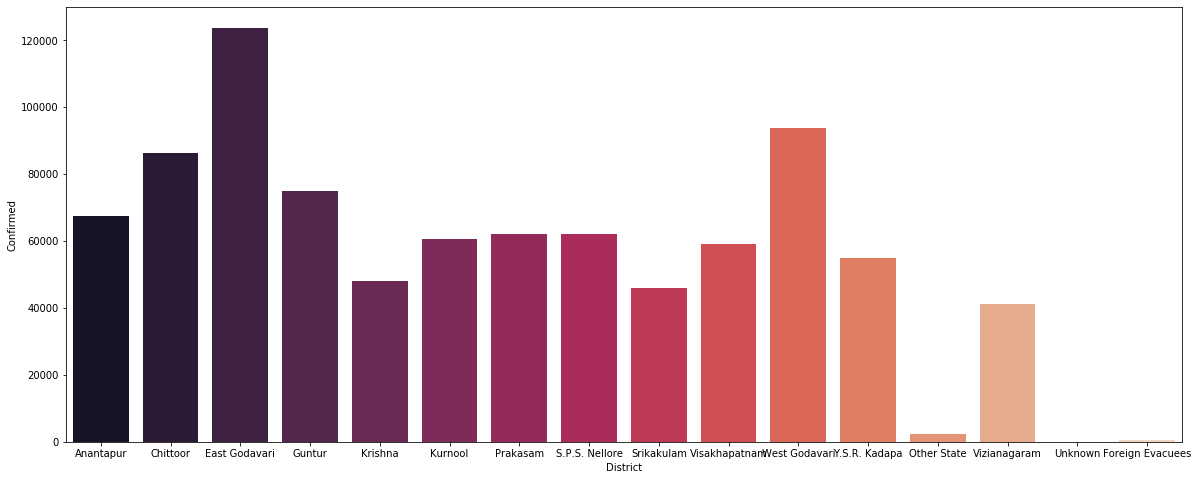

In [28]:
plt.figure(figsize = (20,8))
sns.barplot(x = 'District', y = m['Confirmed'],data=a1, palette = 'rocket')

<h2>EAST GODAVARI - 2865788.576</h2>

In [29]:
b1 = pd.DataFrame()
for i in range(len(a1)):
    if a1.iloc[i]['District'] == 'East Godavari':
        b1 = b1.append(a1.iloc[i])
b1

,Confirmed,Date,Deceased,District,Other,Recovered,State,Tested
3,39.0,2020-04-26,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
411,39.0,2020-04-27,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
832,39.0,2020-04-28,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
1260,40.0,2020-04-29,0.0,East Godavari,0.0,12.0,Andhra Pradesh,NaN
1693,42.0,2020-04-30,0.0,East Godavari,0.0,14.0,Andhra Pradesh,NaN
...,...,...,...,...,...,...,...,...
157731,123695.0,2020-12-31,636.0,East Godavari,0.0,122707.0,Andhra Pradesh,967422.0
158384,123740.0,2021-01-01,636.0,East Godavari,0.0,122723.0,Andhra Pradesh,967422.0
159037,123755.0,2021-01-02,636.0,East Godavari,0.0,122747.0,Andhra Pradesh,967422.0
159690,123766.0,2021-01-03,636.0,East Godavari,0.0,122795.0,Andhra Pradesh,967422.0


In [30]:
b1['daily increase'] = b1['Confirmed'].diff()
b1['daily recovery'] = b1['Recovered'].diff()
b1.fillna(0)

,Confirmed,Date,Deceased,District,Other,Recovered,State,Tested,daily increase,daily recovery
3,39.0,2020-04-26,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,0.0,0.0
411,39.0,2020-04-27,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,0.0,0.0
832,39.0,2020-04-28,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,0.0,0.0
1260,40.0,2020-04-29,0.0,East Godavari,0.0,12.0,Andhra Pradesh,0.0,1.0,0.0
1693,42.0,2020-04-30,0.0,East Godavari,0.0,14.0,Andhra Pradesh,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
157731,123695.0,2020-12-31,636.0,East Godavari,0.0,122707.0,Andhra Pradesh,967422.0,42.0,47.0
158384,123740.0,2021-01-01,636.0,East Godavari,0.0,122723.0,Andhra Pradesh,967422.0,45.0,16.0
159037,123755.0,2021-01-02,636.0,East Godavari,0.0,122747.0,Andhra Pradesh,967422.0,15.0,24.0
159690,123766.0,2021-01-03,636.0,East Godavari,0.0,122795.0,Andhra Pradesh,967422.0,11.0,48.0


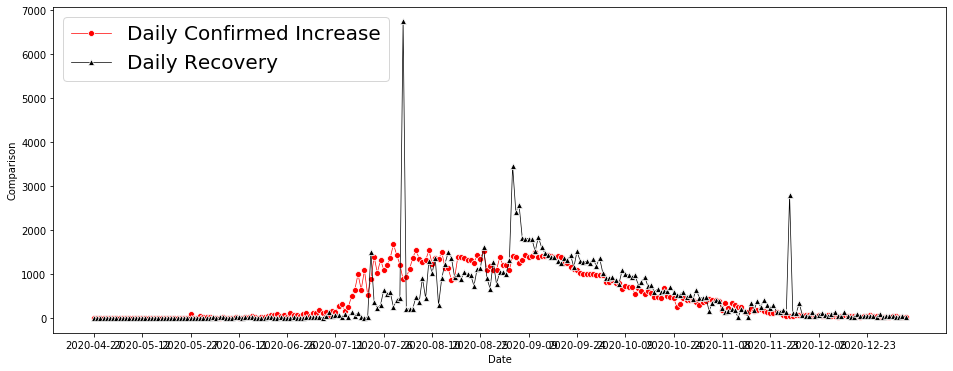

In [51]:
plt.figure(figsize = (16,6))
sns.lineplot(x = b1['Date'], y = b1['daily increase'], color = 'red', marker = "o",label = 'Daily Confirmed Increase', lw = 0.7)
sns.lineplot(x = b1['Date'], y = b1['daily recovery'], color = 'black', marker = "^", label = 'Daily Recovery', lw = 0.7)
plt.xticks(range(0,252, 15))
plt.ylabel('Comparison')
plt.legend(loc ='upper left', prop={'size': 20})

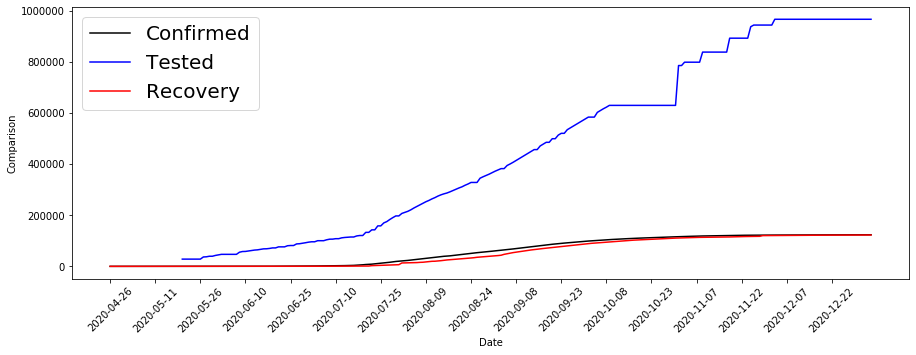

In [32]:
plt.figure(figsize = (15,5))
sns.lineplot(x = b1['Date'], y = b1['Confirmed'], color = 'k', label = 'Confirmed')
sns.lineplot(x = b1['Date'], y = b1['Tested'], color = 'b', label = 'Tested')
sns.lineplot(x = b1['Date'], y = b1['Recovered'], color = 'red', label = 'Recovery')
plt.xticks(range(0,252, 15), rotation = 45)
plt.ylabel('Comparison')
plt.legend(loc ='upper left', prop={'size': 20})

In [33]:
p1 = r'state_wise.csv'
m = pd.read_csv(p1)
df2 = m[1:]
df2

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
1,Maharashtra,1935636,1832825,49580,52084,01/01/2021 21:55:34,1147,MH,0,0,0,"[Dec 16]:10,218 duplicate cases & other state ..."
2,Karnataka,921128,898176,12099,10834,02/01/2021 19:38:34,19,KA,755,976,3,NaN
3,Andhra Pradesh,882850,872545,7111,3194,02/01/2021 19:38:35,0,AP,238,279,3,NaN
4,Tamil Nadu,819845,799427,12146,8272,02/01/2021 19:38:37,0,TN,910,1007,11,[July 22]: 444 backdated deceased entries adde...
5,Kerala,765925,697591,3096,65059,01/01/2021 22:56:30,179,KL,0,0,0,Mahe native who expired in Kannur included in ...
6,Delhi,626448,610535,10571,5342,02/01/2021 19:44:33,0,DL,494,496,14,[July 14]: Value for the total tests conducted...
7,Uttar Pradesh,586752,564541,8379,13832,02/01/2021 08:06:30,0,UP,0,0,0,NaN
8,West Bengal,553216,531862,9738,11616,01/01/2021 20:18:32,0,WB,0,0,0,NaN
9,Odisha,330117,325733,1933,2451,02/01/2021 12:26:33,0,OR,251,0,4,[July 12th] :20 non-covid deaths reported in s...
10,Rajasthan,309319,297819,2705,8795,02/01/2021 19:38:41,0,RJ,467,890,5,NaN


(array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
        1500000., 1750000., 2000000., 2250000.]),
 <a list of 10 Text xticklabel objects>)

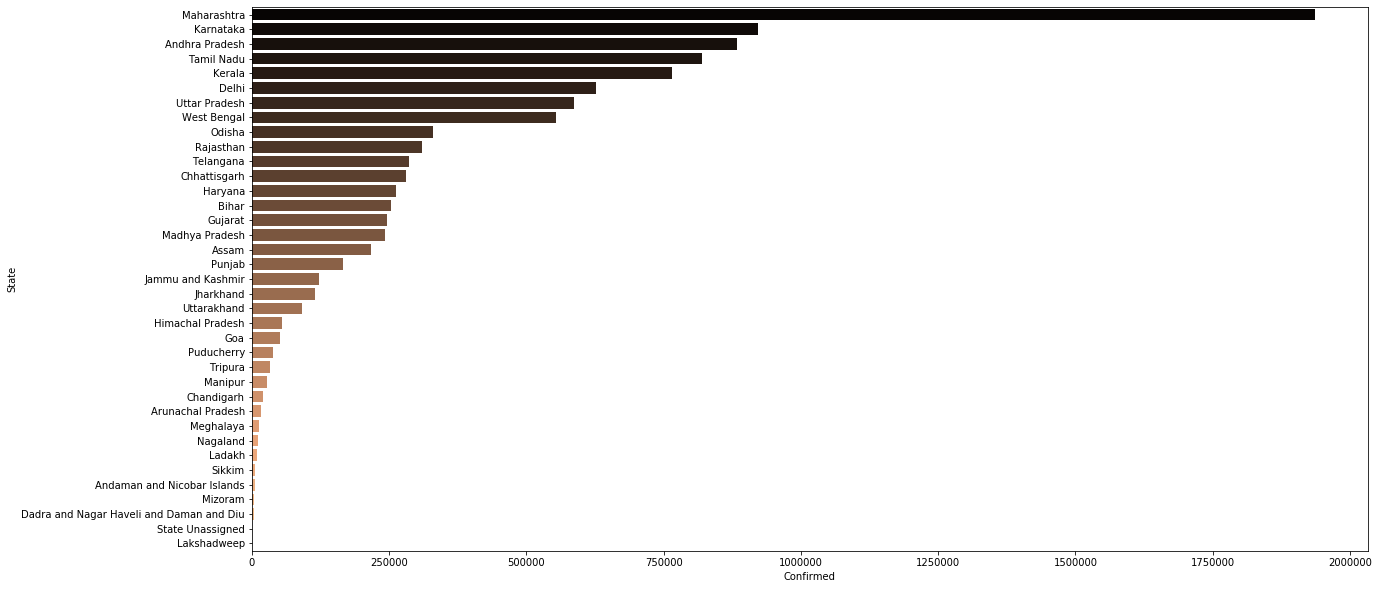

In [16]:
plt.figure(figsize=(20,10))
sns.barplot(y='State',x='Confirmed',data=df2, palette = "copper")
plt.xticks(rotation = 0)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.mlab as mlab
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
X = close.values
history = [x for x in X]
predictions = list()
for t in range(10):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    history.append(yhat)
    print('predicted=%f' % (yhat))
plt.plot(predictions, color='red')
plt.show()